# 卡尔曼滤波器与矩阵类

拥有一个已投入运行的矩阵类之后，你可以使用这个类来运行卡尔曼滤波器！

你需要将你的矩阵类放入到工作区中：
* 点击上面的“JUPYTER”图标。
* 然后打开matrix.py文件，并在那里复制你的代码。
* 确保将matrix.py文件保存。
* 然后再次点击“JUPYTER”图标，并再次打开该文件。

你也可以下载此文件kalman_filter_demo.ipynb，并在你自己的计算机上本地运行该演示文件。

矩阵类加载完成之后，你就可以打开这个演示文件了。通读该文件并逐个运行每个单元格。你不需要在这个 Ipython notebook 中编写任何代码。

演示分为两个不同的部分。第一部分创建模拟数据。第二部分对数据运行卡尔曼滤波器，并将其结果可视化。

### 卡尔曼滤波器 - 为什么如此有用？

卡尔曼滤波器非常擅长处理噪声传感器数据，并将这些数据做平滑处理，从而进行更准确的预测。对于无人驾驶汽车来说，卡尔曼滤波器可用于目标跟踪。


### 卡尔曼滤波器与传感器
目标跟踪通常是在车辆周围放置雷达传感器与激光雷达传感器。雷达传感器可以直接测量在车辆周围移动的物体的距离和速度。激光雷达传感器则仅用来测量距离。

我们暂时先不探讨卡尔曼滤波器，想一想该如何使用激光雷达数据来跟踪对象。假设你的前面有一位正在骑自行车的人。你发出一个激光雷达信号，然后接收到一个信号。激光雷达传感器告诉你，这辆自行车在你正前方10米处，但没有给你速度信息。

当你的激光雷达装置发出另一个信号时，可能会在0.05秒之后。但在这0.05秒内，你的汽车仍然需要跟踪这辆自行车。所以你的车辆会预测它认为自行车会在哪里。但此刻，你的汽车没有这辆自行车的速度信息。

0.05秒后，激光雷达装置发出一个信号并接收另一个信号。这一次，这辆自行车在你前方9.95米处。现在你知道这辆自行车正朝着你以每秒-1米的速度前进。在接下来的0.05秒内，你的汽车将假定自行车正朝着你以-1米/秒的速度前进。然后再发出另一个激光雷达信号并返回一个信息，你可以再次更新位置和速度。

### 传感器噪声
遗憾的是，激光雷达和雷达信号的噪音都很大。换句话说，它们有些不准确。而卡尔曼滤波器有助于消除噪音，这样可以更准确地确定自行车的真实位置和速度数据。

卡尔曼滤波器通过对信号中的不确定性与激光雷达或雷达测量中的不确定性进行权衡来实现这一点。如果你对真实位置和速度的判断非常不确定，卡尔曼滤波器会给传感器更多的权重。如果传感器测量具有更多的不确定性，那么你对于位置的判断会比传感器的测量结果更重要。



# 第1部分 - 生成数据

Ipython notebook 中的下几个单元格会生成模拟数据。想象一下，你正在一辆汽车上，跟踪你前面的另一辆车。你跟踪的所有数据都将与你的位置有关。

在这次模拟中，你处于一条一维的道路上，你正在跟踪的汽车只能向前或向后移动。对于这个模拟数据，你在以100公里/小时的速度行驶，被跟踪的汽车的起始位置在你的前方5米处。这辆汽车正在-10 m / s ^ 2时加速。换句话说，这辆汽车正在减速。

该汽车停在0公里/小时的速度时，它会停止5秒钟。然后，继续朝你加速前进，直到它的速度为-10公里/小时。它以-10公里/小时的速度行驶5秒。不要太担心其他车辆的轨道；其他轨道将在可视化中为你标注出来。


你的汽车上有一个跟踪另一辆车的激光雷达传感器。激光雷达传感器每50毫秒测量一次。

运行下面的代码单元格，启动模拟器并收集有关被跟踪车辆的数据。注意该行`import matrix as m`，m会从最终项目中导入矩阵代码。运行此单元格时，你将看不到任何输出。

In [1]:
%matplotlib inline

import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import datagenerator
import matrix as m

matplotlib.rcParams.update({'font.size': 16})

# data_groundtruth() has the following inputs:
# Generates Data
# Input variables are:
# initial position meters
# initial velocity km/h
# final velocity (should be a negative number) km/h
# acceleration (should be a negative number) m/s^2
# how long the vehicle should idle 
# how long the vehicle should drive in reverse at constant velocity
# time between lidar measurements in milliseconds

time_groundtruth, distance_groundtruth, velocity_groundtruth, acceleration_groundtruth = datagenerator.generate_data(5, 100, -10, -10,
                                                                                              5000, 5000, 50)
data_groundtruth = pd.DataFrame(
    {'time': time_groundtruth,
     'distance': distance_groundtruth,
     'velocity': velocity_groundtruth,
     'acceleration': acceleration_groundtruth
    })

### 将跟踪对象距离可视化

下一个单元格会将模拟数据可视化。第一个可视化会显示出随着时间变化的推移物体的距离。你可以看到汽车正在向前移动，但是在减速。然后汽车停下来5秒，之后向后开5秒。

[Text(0,0.5,'distance (meters)'), Text(0.5,0,'time (milliseconds)')]

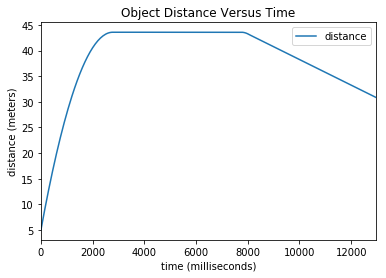

In [3]:
ax1 = data_groundtruth.plot(kind='line', x='time', y='distance', title='Object Distance Versus Time')
ax1.set(xlabel='time (milliseconds)', ylabel='distance (meters)')

### 将随时间变化的速度可视化

下一个单元格会输出随时间推移的速度的可视化。被跟踪的汽车从100公里/小时开始减速至0公里/小时。然后汽车空转，最终再次减速直至减速到-10公里/小时。

[Text(0,0.5,'velocity (km/h)'), Text(0.5,0,'time (milliseconds)')]

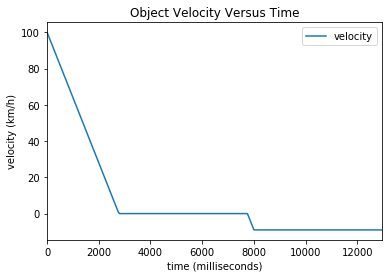

In [4]:
ax2 = data_groundtruth.plot(kind='line', x='time', y='velocity', title='Object Velocity Versus Time')
ax2.set(xlabel='time (milliseconds)', ylabel='velocity (km/h)')

### 将随时间变化加速度可视化

这个单元格显示了被跟踪汽车的加速度情况。该汽车以10m / s ^ 2降速。然后停止5秒，并再次短暂加速。

[Text(0,0.5,'acceleration (m/s^2)'), Text(0.5,0,'time (milliseconds)')]

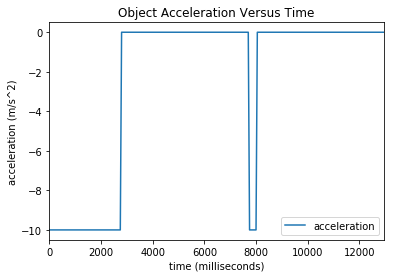

In [5]:
data_groundtruth['acceleration'] = data_groundtruth['acceleration'] * 1000 / math.pow(60 * 60, 2)
ax3 = data_groundtruth.plot(kind='line', x='time', y='acceleration', title='Object Acceleration Versus Time')
ax3.set(xlabel='time (milliseconds)', ylabel='acceleration (m/s^2)')

### 模拟激光雷达数据

以下代码单元格创建了模拟激光雷达数据。 激光雷达数据的噪声很大，所以模拟器每隔0.05秒进行一次地面真实测量，然后增加随机噪声。

In [6]:
# make lidar measurements
lidar_standard_deviation = 0.15
lidar_measurements = datagenerator.generate_lidar(distance_groundtruth, lidar_standard_deviation)
lidar_time = time_groundtruth

### 将激光雷达的测量结果可视化

运行以下单元格，将激光雷达的测量结果与地面实况相比较。 地面实况用红色显示，你可以看到激光雷达测量结果有点嘈杂。

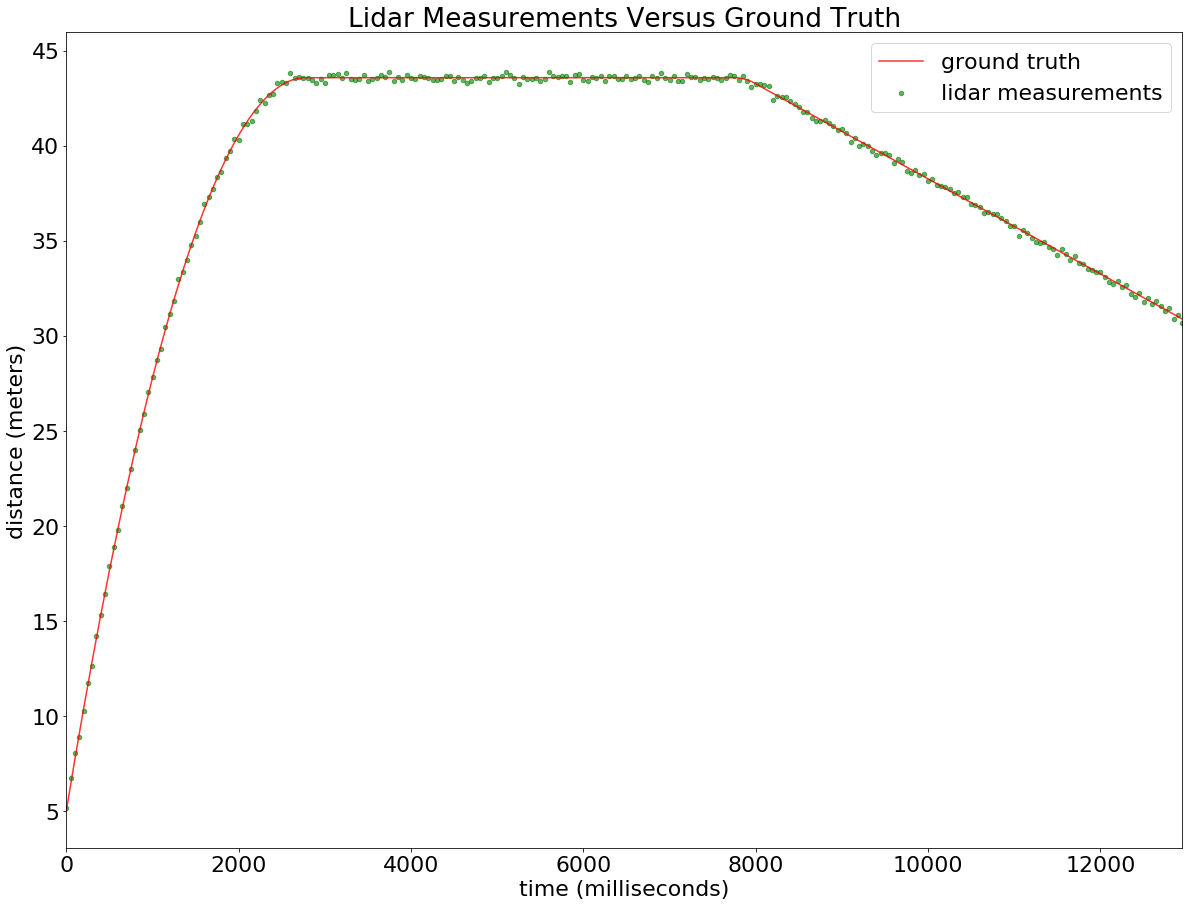

In [7]:
data_lidar = pd.DataFrame(
    {'time': time_groundtruth,
     'distance': distance_groundtruth,
     'lidar': lidar_measurements
    })

matplotlib.rcParams.update({'font.size': 22})

ax4 = data_lidar.plot(kind='line', x='time', y ='distance', label='ground truth', figsize=(20, 15), alpha=0.8,
               title = 'Lidar Measurements Versus Ground Truth', color='red')
ax5 = data_lidar.plot(kind='scatter', x ='time', y ='lidar', label='lidar measurements', ax=ax4, alpha=0.6, color='g')
ax5.set(xlabel='time (milliseconds)', ylabel='distance (meters)')
plt.show()

# 第2部分 - 使用卡尔曼滤波器

演示的下一部分将使用你的矩阵类来运行卡尔曼滤波器。 第一个单元格会将变量初始化，并定义一些函数。

下面的单元格使用激光雷达数据运行卡尔曼滤波器。

In [8]:
# Kalman Filter Initialization

initial_distance = 0
initial_velocity = 0

x_initial = m.Matrix([[initial_distance], [initial_velocity * 1e-3 / (60 * 60)]])
P_initial = m.Matrix([[5, 0],[0, 5]])

acceleration_variance = 50
lidar_variance = math.pow(lidar_standard_deviation, 2)

H = m.Matrix([[1, 0]])
R = m.Matrix([[lidar_variance]])
I = m.identity(2)

def F_matrix(delta_t):
    return m.Matrix([[1, delta_t], [0, 1]])

def Q_matrix(delta_t, variance):
    t4 = math.pow(delta_t, 4)
    t3 = math.pow(delta_t, 3)
    t2 = math.pow(delta_t, 2)
    
    return variance * m.Matrix([[(1/4)*t4, (1/2)*t3], [(1/2)*t3, t2]])

### 运行卡尔曼滤波器

下一个代码单元格用来运行卡尔曼滤波器。在这个演示中，预测步骤从第二次激光雷达测量开始。 当第一个激光雷达信号到达时，没有以前的激光雷达测量值，所以无法计算速度。 换句话说，卡尔曼滤波器预测车辆将要到达的位置，但是直到第一次和第二次激光雷达读数之间的间隔时间过去之后，它才能做出预测。

卡尔曼滤波器有两个步骤：预测步骤与更新步骤。 在预测步骤中，滤波器使用运动模型来确定物体在传感器测量值之间行进的位置。 更新步骤使用传感器测量来调整关于物体位置的判断。

In [9]:
# Kalman Filter Implementation

x = x_initial
P = P_initial

x_result = []
time_result = []
v_result = []


for i in range(len(lidar_measurements) - 1):
        
    # calculate time that has passed between lidar measurements
    delta_t = (lidar_time[i + 1] - lidar_time[i]) / 1000.0

    # Prediction Step - estimates how far the object traveled during the time interval
    F = F_matrix(delta_t)
    Q = Q_matrix(delta_t, acceleration_variance)
    
    x_prime = F * x
    P_prime = F * P * F.T() + Q
    
    # Measurement Update Step - updates belief based on lidar measurement
    y = m.Matrix([[lidar_measurements[i + 1]]]) - H * x_prime
    S = H * P_prime * H.T() + R
    K = P_prime * H.T() * S.inverse()
    x = x_prime + K * y
    P = (I - K * H) * P_prime

    # Store distance and velocity belief and current time
    x_result.append(x[0][0])
    v_result.append(3600.0/1000 * x[1][0])
    time_result.append(lidar_time[i+1])
    
result = pd.DataFrame(
    {'time': time_result,
     'distance': x_result,
     'velocity': v_result
    })

### 将结果可视化

以下代码单元格会输出卡尔曼滤波器的可视化结果。 该可视化会包含地面测量数据、激光雷达测量数据和卡尔曼滤波的判断。需要注意的是，卡尔曼滤波器会对从激光雷达测量中获得的信息做平滑处理。

事实证明，若同时使用多个传感器（如雷达和激光雷达），结果往往更准确。 同时使用多种类型的传感器，这称为传感器融合，你将在无人驾驶汽车工程师纳米学位项目中了解到具体信息。

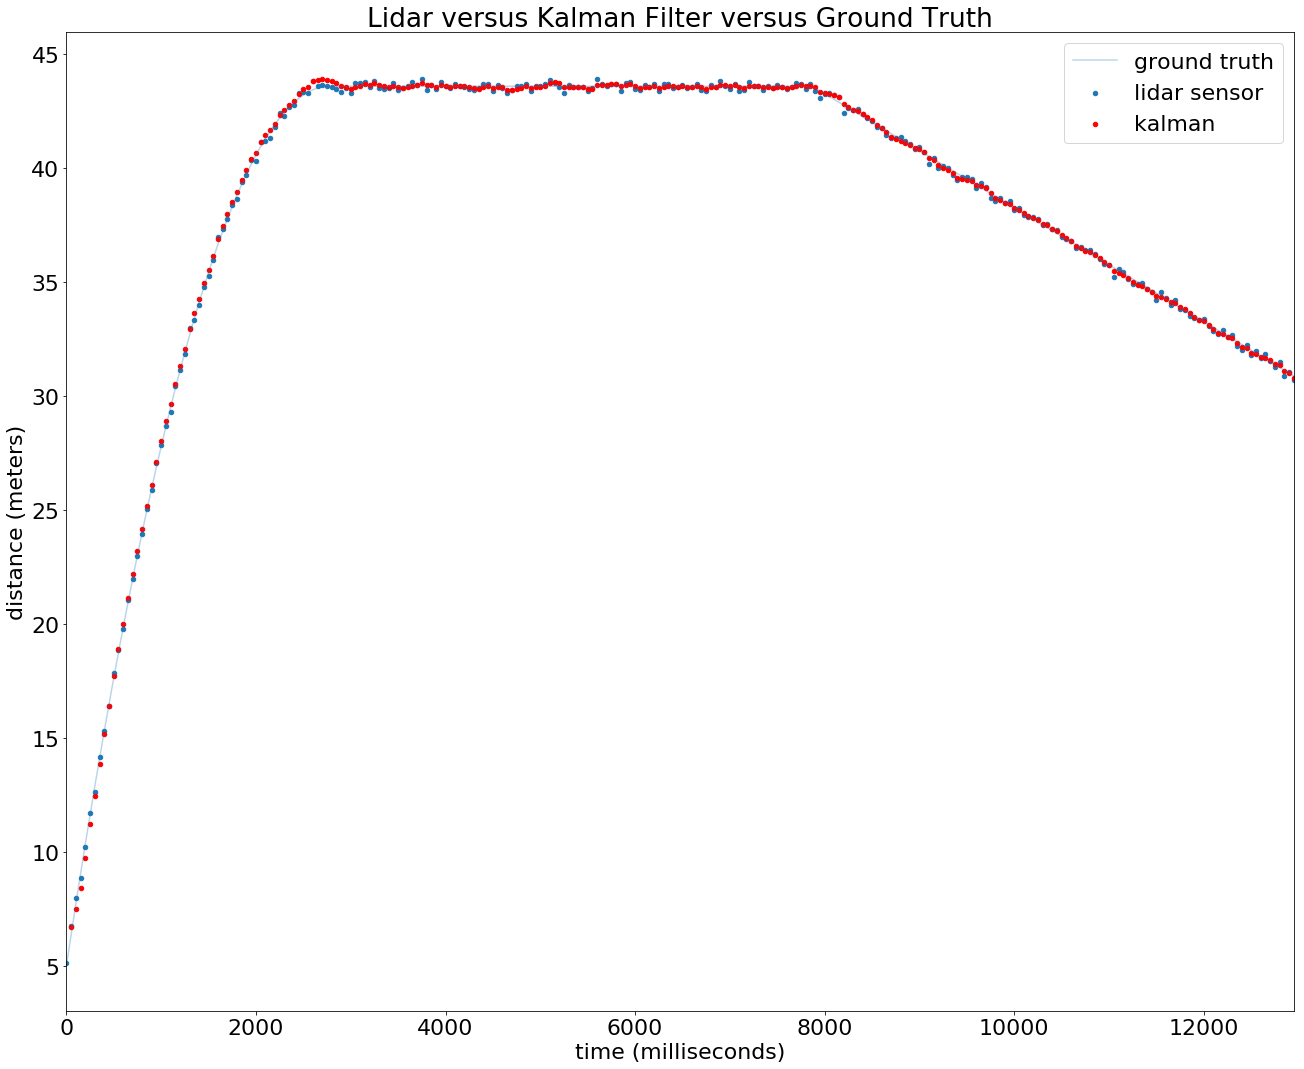

In [10]:
ax6 = data_lidar.plot(kind='line', x='time', y ='distance', label='ground truth', figsize=(22, 18), alpha=.3, title='Lidar versus Kalman Filter versus Ground Truth')
ax7 = data_lidar.plot(kind='scatter', x ='time', y ='lidar', label='lidar sensor', ax=ax6)
ax8 = result.plot(kind='scatter', x = 'time', y = 'distance', label='kalman', ax=ax7, color='r')
ax8.set(xlabel='time (milliseconds)', ylabel='distance (meters)')
plt.show()

### 将速度可视化

卡尔曼滤波器最有趣的一个好处是，它可以让你了解你无法直接测量的变量。 虽然激光雷达不直接提供速度信息，但卡尔曼滤波器可以从激光雷达的测量数据中推断出速度。

该可视化显示了卡尔曼滤波器的速度估计与地面实况的对比。 该卡尔曼滤波器中使用的运动模型相对简单； 它假定速度是恒定的，并且加速了随机噪声。 你可以看到这个运动模型可能太简单了，因为卡尔曼滤波器在物体减速时无法预测速度。

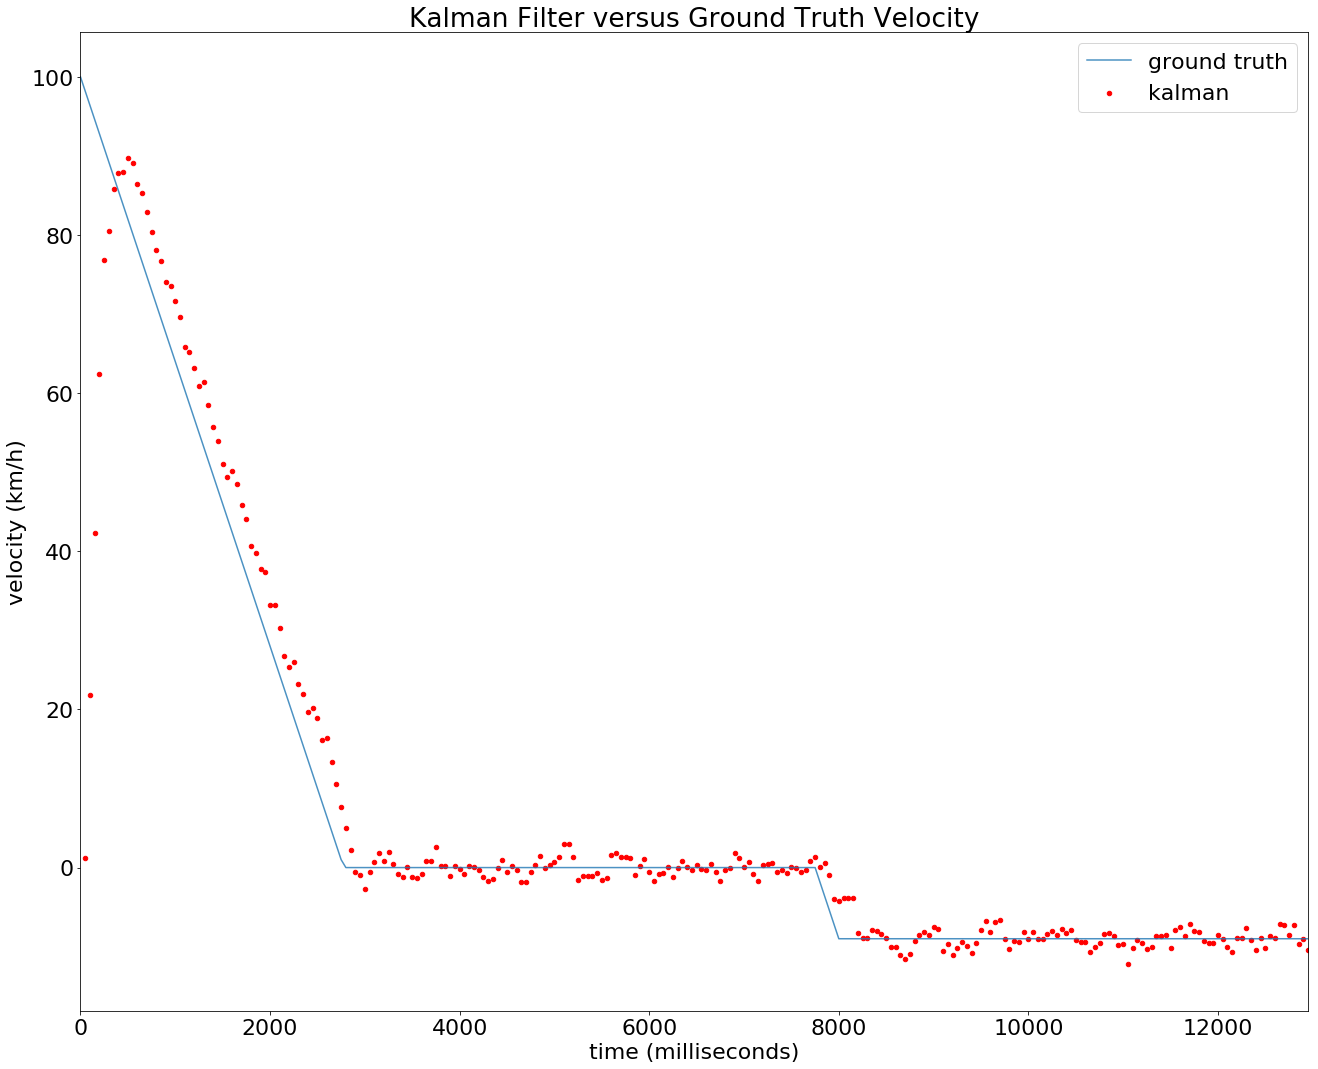

In [11]:
ax1 = data_groundtruth.plot(kind='line', x='time', y ='velocity', label='ground truth', figsize=(22, 18), alpha=.8, title='Kalman Filter versus Ground Truth Velocity')
ax2 = result.plot(kind='scatter', x = 'time', y = 'velocity', label='kalman', ax=ax1, color='r')
ax2.set(xlabel='time (milliseconds)', ylabel='velocity (km/h)')
plt.show()